# Spotify Music Genre Prediction For Classical Rock Genre

This notebook is by Ben Pung (me) and is a demonstration in machine learning techniques, data cleaning, and data analysis. Hopefully you find it useful to learn or get to know more about me and my skills or interests!

## Import the Data

I start by importing all the normal imports and loading the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

df = pd.read_csv("Spotify-2000.csv")

In [4]:
#Display the data
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Next since I am now trying to do an analysis on classic rock, I will chose to binary encode the classic rock as a 1 and the rest as 0. I do this using the lambda function.

In [5]:
df["Genre Index"] = df["Top Genre"].apply(lambda x:  1 if x=="album rock" else 0) 

Drop the artist, title, index, and top genre from the list because I am not using these columns of data.

In [6]:
df = df.drop(columns=['Artist', 'Title', 'Index', 'Top Genre'])

In [7]:
print(df.dtypes)

Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
Genre Index                int64
dtype: object


I see that the Length is an object data type so I need to convert that to a number!

In [8]:
df = df.rename(columns = {"Length (Duration)" : "Length"})

Change Length (Duration) to Length because it's annoying me

In [9]:
df["Length"] = df["Length"].apply(lambda x:  x.replace(',','') if not isinstance(x, int) else x)

In [10]:
df.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Genre Index
0,2004,157,30,53,-14,11,68,201,94,3,71,0
1,2000,135,79,50,-11,17,81,207,17,7,39,1
2,2001,168,69,66,-9,7,52,341,2,17,69,0
3,2007,173,96,43,-4,3,37,269,0,4,76,0
4,2002,106,82,58,-5,10,87,256,1,3,59,0


In [11]:
df["Length"] = pd.to_numeric(df["Length"])

In [12]:
df["Length"]

0       201
1       207
2       341
3       269
4       256
       ... 
1989    128
1990    136
1991    162
1992    324
1993    148
Name: Length, Length: 1994, dtype: int64

Now our data should be workable because it's all in numerical form. 

In [13]:
print(df.dtypes)

Year                      int64
Beats Per Minute (BPM)    int64
Energy                    int64
Danceability              int64
Loudness (dB)             int64
Liveness                  int64
Valence                   int64
Length                    int64
Acousticness              int64
Speechiness               int64
Popularity                int64
Genre Index               int64
dtype: object


# Exploratory Data Analysis!

## Null and Duplicated Data

The first thing I want to do is just check for any null values. Luckily it looks like this data set does not have any null. I also check for any values less than 0.

In [14]:
np.isnan(df).sum()

Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length                    0
Acousticness              0
Speechiness               0
Popularity                0
Genre Index               0
dtype: int64

It looks like there is only one column with any negatives. After a quick google it turns out loudness is measured from reference so the fact that it is negative is fine. 

Now I check to understand if there is any missing or null data in the set. There is not so onto the next.

In [15]:
df.isna().sum()

Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length                    0
Acousticness              0
Speechiness               0
Popularity                0
Genre Index               0
dtype: int64

## Distribution Checks

Below is the distrubution for the number of album rock values compared to the other types of genres. It is clear that the majority of songs are not album rock but there are quite a few that are. This seems that it would be a good spread.

<AxesSubplot:>

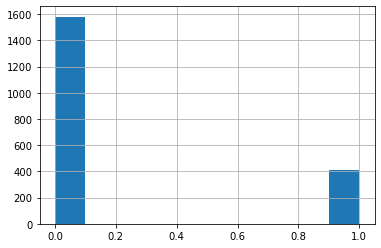

In [16]:
df["Genre Index"].hist()

There is no missing data so I will not do any distribution checks to see if the missing data is evenly distributed. Rather, if there was, I would just check to see if the missing data was random or not.

## Feature Engineering

In [17]:
df.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Genre Index
0,2004,157,30,53,-14,11,68,201,94,3,71,0
1,2000,135,79,50,-11,17,81,207,17,7,39,1
2,2001,168,69,66,-9,7,52,341,2,17,69,0
3,2007,173,96,43,-4,3,37,269,0,4,76,0
4,2002,106,82,58,-5,10,87,256,1,3,59,0


One thing I would like to change is the loudness being negative. I eventually want all of my values between 0 and 1 after I normalize so I want to just make loudness positive for right now.

In [18]:
minimum = df["Loudness (dB)"].min() * -1
df["Loudness (dB)"] = df["Loudness (dB)"] + minimum
df

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Genre Index
0,2004,157,30,53,13,11,68,201,94,3,71,0
1,2000,135,79,50,16,17,81,207,17,7,39,1
2,2001,168,69,66,18,7,52,341,2,17,69,0
3,2007,173,96,43,23,3,37,269,0,4,76,0
4,2002,106,82,58,22,10,87,256,1,3,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1958,94,21,70,15,11,72,128,84,7,63,0
1990,1958,175,76,36,19,76,95,136,73,6,69,0
1991,1959,168,80,53,18,31,97,162,74,7,74,0
1992,1959,174,26,45,14,7,60,324,54,4,65,0


The next thing to do is to normalize the data. 

In [19]:
predictors = list(set(list(df.columns)))
df[predictors] = df[predictors]/df[predictors].max()

In [20]:
df[predictors]

,Beats Per Minute (BPM),Valence,Danceability,Genre Index,Energy,Length,Popularity,Year,Liveness,Speechiness,Acousticness,Loudness (dB)
0,0.762136,0.686869,0.552083,0.0,0.30,0.142351,0.71,0.992571,0.111111,0.054545,0.949495,0.52
1,0.655340,0.818182,0.520833,1.0,0.79,0.146601,0.39,0.990589,0.171717,0.127273,0.171717,0.64
2,0.815534,0.525253,0.687500,0.0,0.69,0.241501,0.69,0.991085,0.070707,0.309091,0.020202,0.72
3,0.839806,0.373737,0.447917,0.0,0.96,0.190510,0.76,0.994056,0.030303,0.072727,0.000000,0.92
4,0.514563,0.878788,0.604167,0.0,0.82,0.181303,0.59,0.991580,0.101010,0.054545,0.010101,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.456311,0.727273,0.729167,0.0,0.21,0.090652,0.63,0.969787,0.111111,0.127273,0.848485,0.60
1990,0.849515,0.959596,0.375000,0.0,0.76,0.096317,0.69,0.969787,0.767677,0.109091,0.737374,0.76
1991,0.815534,0.979798,0.552083,0.0,0.80,0.114731,0.74,0.970282,0.313131,0.127273,0.747475,0.72
1992,0.844660,0.606061,0.468750,0.0,0.26,0.229462,0.65,0.970282,0.070707,0.072727,0.545455,0.56


In [21]:
df = df.dropna()

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1994.0,0.987119,0.007982,0.968796,0.980188,0.987122,0.994056,1.0
Beats Per Minute (BPM),1994.0,0.583571,0.136059,0.179612,0.480583,0.577670,0.660194,1.0
Energy,1994.0,0.596795,0.221543,0.030000,0.420000,0.610000,0.780000,1.0
Danceability,1994.0,0.554565,0.159912,0.104167,0.447917,0.552083,0.666667,1.0
Loudness (dB),1994.0,0.719659,0.145915,0.000000,0.640000,0.760000,0.840000,1.0
Liveness,1994.0,0.192041,0.168963,0.020202,0.090909,0.121212,0.232323,1.0
Valence,1994.0,0.499078,0.251093,0.030303,0.292929,0.474747,0.704545,1.0
Length,1994.0,0.185866,0.066292,0.065864,0.150142,0.173513,0.204674,1.0
Acousticness,1994.0,0.291496,0.293050,0.000000,0.030303,0.181818,0.505051,1.0
Speechiness,1994.0,0.090818,0.080028,0.036364,0.054545,0.072727,0.090909,1.0


In [23]:
#Show new duplicated variables -> none
print(df.duplicated().sum())

0


Next I remove any features with a low variance and therefore low impact using the variance threshold package in sklearn

In [24]:
from sklearn.feature_selection import VarianceThreshold
#create the threshold
vt = VarianceThreshold(threshold=.01)
#remove features with a low variance
vt.fit(df)
#grab the column names
mask = vt.get_support()
#add the column names back to the updated dataframe
df = df.loc[:, mask]
#update list of predictors
predictors = list(set(list(df.columns)))
df.head()


,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Popularity,Genre Index
0,0.762136,0.30,0.552083,0.52,0.111111,0.686869,0.949495,0.71,0.0
1,0.655340,0.79,0.520833,0.64,0.171717,0.818182,0.171717,0.39,1.0
2,0.815534,0.69,0.687500,0.72,0.070707,0.525253,0.020202,0.69,0.0
3,0.839806,0.96,0.447917,0.92,0.030303,0.373737,0.000000,0.76,0.0
4,0.514563,0.82,0.604167,0.88,0.101010,0.878788,0.010101,0.59,0.0


## Modeling

Now that the dataset has been finalized I can now split the data.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictors].values, df["Genre Index"], test_size=.90, random_state=40)

## Multi Layer Perceptron

Now that I have all the data where it needs to be I will use a few different models to test out predcitions. The first I will show is a multi-layer perceptron. I chose this because mlps are use for supervised learning (this is a great demonstration for that).

In [34]:
from sklearn.neural_network import MLPClassifier
nodes = len(df.columns)
mlp = MLPClassifier(hidden_layer_sizes=(nodes,nodes), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

mlp_prediction = mlp.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1425
         1.0       1.00      1.00      1.00       370

    accuracy                           1.00      1795
   macro avg       1.00      1.00      1.00      1795
weighted avg       1.00      1.00      1.00      1795



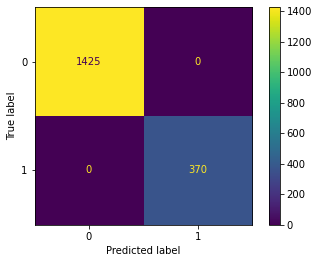

In [35]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, mlp_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, mlp_prediction))

In [36]:
total = cm[0][1] + cm[0][0] + cm[1][0] + cm[1][1]
orig_tp = cm[0][0]
orig_tn = cm[1][1]
orig_fp = cm[1][0]
orig_fn = cm[0][1]
orig_accuracy = (cm[0][0] + cm[1][1]) / total

total, orig_tp, orig_tn, orig_fp, orig_fn, orig_accuracy

(1795, 1425, 370, 0, 0, 1.0)

Looking at the results above, the mlp seems to have a pretty fair prediction of the data. This model has 2 true negatives and no false postives. This seems like a pretty good model for the data.

### Logistic Regression

Logistic Regression is a logical choice when evaluating binary data because the answer is either correct or not. This means we could possibly split the data into the correct category if it is possible. 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1425
         1.0       1.00      1.00      1.00       370

    accuracy                           1.00      1795
   macro avg       1.00      1.00      1.00      1795
weighted avg       1.00      1.00      1.00      1795



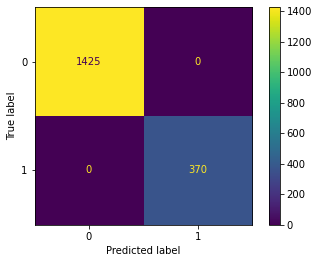

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

cm = confusion_matrix(y_test, lr_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, lr_predict))


This model seems incredibly accurate as it predicts all of the test data just based on the fit of regression. There are no false positives or false negatives. It seems the data can truly be classified well. 

## K Nearest Neighbor

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1425
         1.0       1.00      1.00      1.00       370

    accuracy                           1.00      1795
   macro avg       1.00      1.00      1.00      1795
weighted avg       1.00      1.00      1.00      1795



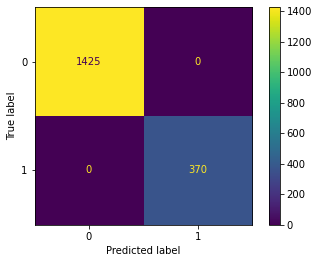

In [38]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

neigh.fit(X_train, y_train)

predict_test = neigh.predict(X_test)


cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, predict_test))

The k nearerest neighbors is a common tool that uses relative distance from clusters to determine classification. This model also has a very good undesrstanding of the data with no false positives or true negatives. I'm starting to get a sense that our data I am feeding the model may be too small because the models are predicting very well.

I considered that there was overfitting but the training set is only a few hundred data points so I wouldnt think that would be the issue. 

Thanks!